### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Exploring dataset

In [9]:
data = pd.read_csv('dataset.csv')
data.tail()

,name,ratings,price,imgURL,corpus
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2543,Motorola a50,4.1,1549,https://rukminim2.flixcart.com/image/312/312/k...,NaN
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 13Processor T...


### Data Cleaning - removing missing values

In [4]:
# before cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2546, 5),
 name        0
 ratings     0
 price       0
 imgURL      0
 corpus     12
 dtype: int64)

In [10]:
data = data.dropna()

# after cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

### Feature Extraction

In [11]:
# to extract storage information from corpus
def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    storage = re.search(r'Storage(\d+)', corpus)
    if storage:
        return int(storage.group(1))
    return None

# to extract ram information from corpus
def extract_ram(corpus):
    ram = re.search(r'RAM(\d+)', corpus)
    if ram:
        return int(ram.group(1))
    return None

# to extract operating system name from corpus
def extract_os(corpus):
    os = re.search(r'System(.*?)Processor', corpus)
    if os:
        return os.group(1).strip()
    return None

# to extract processor details from corpus
def extract_processor(corpus):
    """Extract the processor type from the corpus."""
    processor = re.search(r'Processor (.*?) ', corpus)
    if processor:
        return processor.group(1).strip()
    return None

# to extract brand name from corpus
def extract_brand(name):
    return name.split()[0]



data['Storage'] = data['corpus'].apply(extract_storage)
data['RAM'] = data['corpus'].apply(extract_ram)
data['OS'] = data['corpus'].apply(extract_os)
data['Processor'] = data['corpus'].apply(extract_processor)
data['Brand'] = data['name'].apply(extract_brand)

data.tail()


,name,ratings,price,imgURL,corpus,Storage,RAM,OS,Processor,Brand
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...,128.0,8.0,Android 10,Speed2.73,SAMSUNG
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...,64.0,4.0,Android 10,TypeMediaTek,REDMI
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...,128.0,8.0,Android 11,Speed2.4,OnePlus
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...,256.0,12.0,Android 12,TypeOcta,SAMSUNG
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 13Processor T...,128.0,6.0,Android 13,TypeDimensity,vivo


In [13]:
# # Check the unique values for 'OS' and 'Processor'
# all_os = data['OS'].unique()
# all_processors = data['Processor'].unique()

# all_os, all_processors

### Data Normalization

In [14]:
# to normalize operating system names
def normalize_os(os):
    if pd.isnull(os):
        return None
    if 'android' in os.lower():
        return 'Android'
    if 'ios' in os.lower():
        return 'iOS'
    if 'tizen' in os.lower():
        return 'Tizen'
    if 'series 30' in os.lower():
        return 'Series 30'
    return 'Other'


data['OS'] = data['OS'].apply(normalize_os)

all_os = data['OS'].unique()

all_os


array(['Android', 'iOS', None, 'Other', 'Series 30', 'Tizen'],
      dtype=object)

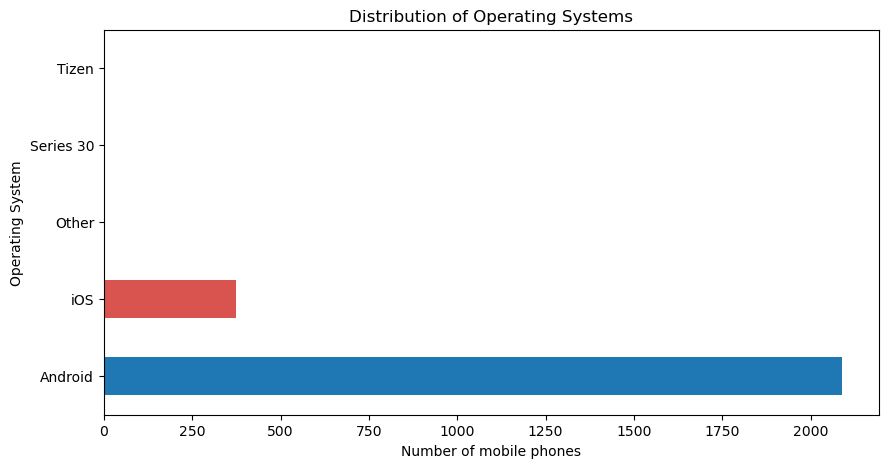

In [15]:
# operating system visualization
data['OS'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Operating Systems')
plt.xlabel('Number of mobile phones')
plt.ylabel('Operating System')
plt.show()

In [16]:
# to normalize processor names
def normalize_processor(processor):
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'mtk' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'sdm' in processor.lower():
        return 'Qualcomm'
    if 'Snapdragon' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    if 'samsung' in processor.lower():
        return 'Samsung'
    if 'exynos' in processor.lower():
        return 'Samsung'
    return 'Other'


data['Processor'] = data['Processor'].apply(normalize_processor)

# Check the unique values for 'Processor'
all_processor = data['Processor'].unique()

all_processor

array(['MediaTek', 'Other', 'Qualcomm', None, 'Samsung', 'Apple'],
      dtype=object)

### Data Visualization

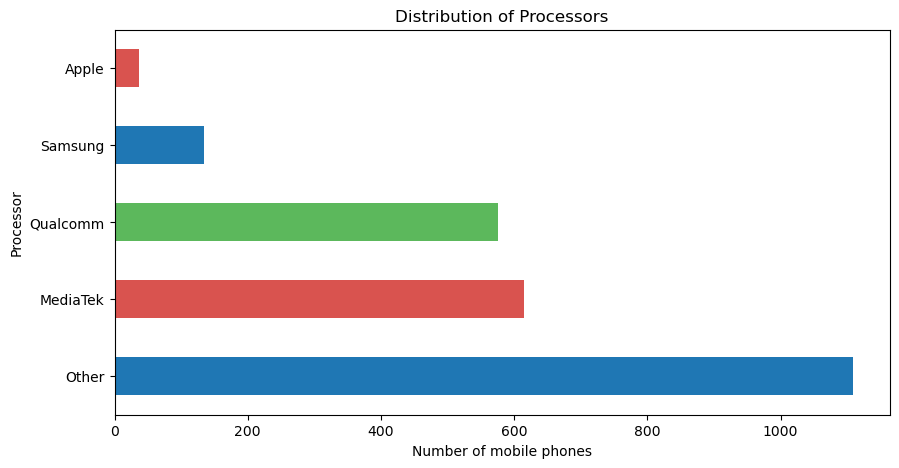

In [17]:
# processor visualization
data['Processor'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Processors')
plt.xlabel('Number of mobile phones')
plt.ylabel('Processor')
plt.show()

In [18]:
def remove_dollar(price):
    price2 = re.sub(r'\D', '', str(price))
    try:
        return int(price2)
    except ValueError:
        return None

data['price'] = data['price'].apply(remove_dollar)

# Check the first few rows of the DataFrame
data.head()

,name,ratings,price,imgURL,corpus,Storage,RAM,OS,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE


In [19]:
def normalize_brand(brand):
    if pd.isnull(brand):
        return None
    if 'xiaomi' in brand.lower():
        return 'Xiaomi'
    if 'redmi' in brand.lower():
        return 'Xiaomi'
    if 'mi' in brand.lower():
        return 'Xiaomi'
    if 'oppo' in brand.lower():
        return 'OPPO'
    if 'oneplus' in brand.lower():
        return 'OnePlus'
    if 'apple' in brand.lower():
        return 'Apple'
    if 'samsung' in brand.lower():
        return 'Samsung'
    if 'vivo' in brand.lower():
        return 'Vivo'
    if 'moto' in brand.lower():
        return 'Motorola'
    if 'motorola' in brand.lower():
        return 'Motorola'
    if 'infinix' in brand.lower():
        return 'Infinix'
    return 'Other'


data['Brand'] = data['Brand'].apply(normalize_brand)

all_brand = data['Brand'].unique()
all_brand

array(['Xiaomi', 'OPPO', 'OnePlus', 'Apple', 'Infinix', 'Samsung', 'Vivo',
       'Motorola', 'Other'], dtype=object)

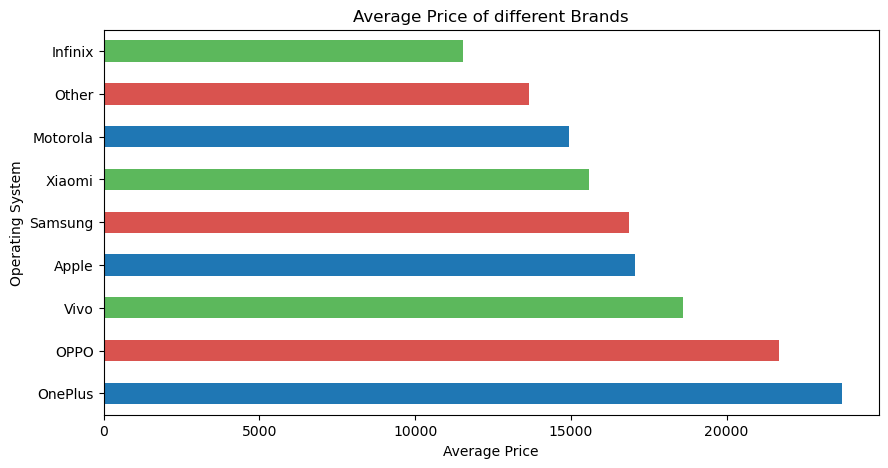

In [20]:
# Brand vs price visualization
avg = data.groupby('Brand')['price'].mean()
avg = avg.sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
avg.plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Average Price of different Brands')
plt.xlabel('Average Price')
plt.ylabel('Operating System')
plt.show()

### Data Mining

In [23]:
# to find the list of all suitable mobile phones
def find_mobiles(brand, storage, min_price, max_price):
    filtered_list = data[(data['Brand'] == brand) & (data['Storage'] == storage) & 
    (data['price'] >= min_price) & (data['price'] <= max_price)]
    return filtered_list.sort_values(by='ratings', ascending=False).head(10)


list = find_mobiles(brand='Apple', storage=128.0, min_price=6000, max_price=55000)


In [28]:
from ipywidgets import interact
from IPython.display import clear_output
def update_list():
    global list
    list = find_mobiles(brand=brand2, storage=storage2,  min_price=min_p, max_price=max_p)
    

brand2=""
ram2=""
storage2=""
min_p=0
max_p=0
def func_brand(Brand):
    global brand2
    brand2=Brand
#     print(brand2)
    update_list()
    
def func_storage(Storage):
    global storage2
    storage2=Storage
    update_list()
#     print(os)


def func_min_price(min_price):
    global min_p
    min_p=min_price
    update_list()
#     print(min_p)

def func_max_price(max_price):
    global max_p
    max_p=max_price
    update_list()
#     print(max_p)

a  = interact(func_brand, Brand=['Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo', 'OPPO', 'Infinix', 'OnePlus' 'Others'])
e  = interact(func_storage, Storage=[2.0, 4.0, 6.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0])
c = interact(func_min_price, min_price=(2000,10000));
d = interact(func_max_price, max_price=(10000,100000));
update_list()

import ipywidgets as widgets


button = widgets.Button(description="Recommend")
output = widgets.Output()

display(button, output)

@output.capture()
def on_button_clicked(b):
    global list
    clear_output(wait=True)
    print('Top 10 recommendations:- ')
    i=1
    for ind in list.index:
        print(f"{i}. {list['name'][ind]} at ₹{list['price'][ind]} - ({list['ratings'][ind]})")
        i=i+1
#     b.icon="warning"

button.on_click(on_button_clicked)

interactive(children=(Dropdown(description='Brand', options=('Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo',…

interactive(children=(Dropdown(description='Storage', options=(2.0, 4.0, 6.0, 8.0, 16.0, 32.0, 64.0, 128.0, 25…

interactive(children=(IntSlider(value=6000, description='min_price', max=10000, min=2000), Output()), _dom_cla…

interactive(children=(IntSlider(value=55000, description='max_price', max=100000, min=10000), Output()), _dom_…

Button(description='Recommend', style=ButtonStyle())

Output()